#SVM & Naïve Bayes


## Theory

### What is a Support Vector Machine (SVM)

A Support Vector Machine (SVM) is a supervised learning algorithm used for classification and regression. It finds a hyperplane that best separates classes by maximizing the margin (distance) between nearest points of different classes (support vectors).

### What is the difference between Hard Margin and Soft Margin SVM

Hard margin SVM requires perfect separability of classes—no misclassification allowed. Soft margin SVM allows some misclassification (slack variables) controlled by a penalty parameter C to improve generalization when data is noisy or not linearly separable.

### What is the mathematical intuition behind SVM

SVM aims to maximize the margin between classes: maximize ||w||^{-1} subject to y_i (w·x_i + b) >= 1 for all i (in the linear separable case). This can be formulated as a convex quadratic optimization problem: minimize (1/2)||w||^2 subject to the constraints. Using Lagrange multipliers leads to the dual problem where the solution depends only on inner products between training points, enabling kernelization.

### What is the role of Lagrange Multipliers in SVM

Lagrange multipliers convert the constrained optimization into an unconstrained dual problem. They allow solving for coefficients (alpha_i) that indicate each training point's importance. Non-zero alpha correspond to support vectors. The dual formulation uses dot products and allows the kernel trick.

### What are Support Vectors in SVM

Support vectors are training examples with non-zero Lagrange multipliers (alpha). They lie on or inside the margin and determine the position of the separating hyperplane; removing non-support vectors does not change the decision boundary.

### What is a Support Vector Classifier (SVC)

SVC typically refers to the classification implementation of SVM (e.g., sklearn.svm.SVC). It finds a separating hyperplane in the input or feature space (via kernel) and assigns class labels.

### What is a Support Vector Regressor (SVR)

SVR applies the SVM idea to regression. It finds a function that deviates from targets by at most epsilon in a tube while keeping the function as flat as possible. Support vectors are points outside the epsilon-tube.

### What is the Kernel Trick in SVM

The kernel trick replaces dot products with a kernel function k(x_i, x_j) that computes an inner product in a (possibly high-dimensional) feature space without explicitly mapping inputs. This enables non-linear decision boundaries while keeping computation efficient.

### Compare Linear Kernel, Polynomial Kernel, and RBF Kernel

Linear kernel: k(x,y)=x·y — good for linearly separable data or high-dimensional sparse features (e.g., text).

Polynomial kernel: k(x,y)=(gamma x·y + coef0)^degree — captures polynomial relationships; degree controls complexity.

RBF (Gaussian) kernel: k(x,y)=exp(-gamma||x-y||^2) — local, infinitely dimensional; flexible and widely used; gamma controls locality/smoothness.

### What is the effect of the C parameter in SVM

C trades off margin width and misclassification. Large C -> low tolerance for misclassification (harder margin), may overfit. Small C -> wider margin allowing more misclassifications, may generalize better.

### What is the role of the Gamma parameter in RBF Kernel SVM

Gamma controls the influence of single training examples. Large gamma -> each point has small influence (very wiggly decision boundary -> potential overfitting). Small gamma -> points have far-reaching influence (smoother boundary -> underfitting possible).

### What is the Naïve Bayes classifier, and why is it called 'Naïve'

Naïve Bayes is a probabilistic classifier based on Bayes' theorem that assumes feature independence conditional on the class label. It's 'naïve' because the conditional independence assumption is strong and often violated in practice, yet the classifier works well in many domains, especially text.

### What is Bayes’ Theorem

Bayes' theorem: P(A|B) = P(B|A) P(A) / P(B). In classification: P(class|features) ∝ P(features|class) P(class).

### Explain the differences between Gaussian, Multinomial, and Bernoulli Naïve Bayes

GaussianNB: models continuous features with class-conditional Gaussian distributions.

MultinomialNB: models count features (term frequencies) — common in text classification with bag-of-words.

BernoulliNB: models binary features (presence/absence of features), suitable for binary occurrence data.

### When should you use Gaussian Naïve Bayes over other variants

Use GaussianNB when features are continuous and approximately normally distributed (or you can normalize them).

### What are the key assumptions made by Naïve Bayes

Main assumption: features are conditionally independent given the class. Also assumes features' distributions according to chosen variant (Gaussian for continuous, multinomial for counts, Bernoulli for binary).

### What are the advantages and disadvantages of Naïve Bayes

Advantages: fast, simple, works well with high-dimensional data (e.g., text), requires small training data, probabilistic output.

Disadvantages: strong independence assumption, can produce poor probability estimates, less flexible than complex models.

### Why is Naïve Bayes a good choice for text classification

Text (bag-of-words) features are high-dimensional and sparse. Naïve Bayes handles high-dimensional data well, is fast to train, and MultinomialNB matches the count-based nature of text features.

### Compare SVM and Naïve Bayes for classification tasks

SVM: discriminative, good for small-to-medium datasets, effective in high dimensions, robust with kernels, often achieves high accuracy but can be slower to train.

Naïve Bayes: generative, extremely fast, simple, works well on high-dimensional sparse data (text). SVM typically performs better when decision boundary is complex; Naïve Bayes is competitive for text and when independence approx holds.

### How does Laplace Smoothing help in Naïve Bayes?

Laplace smoothing (add-one smoothing) prevents zero probabilities for unseen feature-class combinations by adding a small constant (usually 1) to counts. This helps avoid zeroing out posterior probabilities.



## Theoretical Coding Tasks

Below are code implementations for the specified theoretical tasks. Run the cells to reproduce results.

In [2]:
# 1. Train an SVM Classifier on the Iris dataset and evaluate accuracy
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

iris = datasets.load_iris()
X = iris.data
y = iris.target

# scale features for SVM
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

svc = SVC(kernel='rbf', random_state=42)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9111111111111111

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.82      0.93      0.88        15
           2       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45



In [3]:
# 2. Train two SVM classifiers with Linear and RBF kernels on the Wine dataset, then compare accuracies
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

wine = datasets.load_wine()
X = wine.data
y = wine.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0, stratify=y)

svc_lin = SVC(kernel='linear', C=1.0, random_state=0)
svc_rbf = SVC(kernel='rbf', C=1.0, random_state=0)

svc_lin.fit(X_train, y_train)
svc_rbf.fit(X_train, y_train)

print("Linear Kernel Accuracy:", accuracy_score(y_test, svc_lin.predict(X_test)))
print("RBF Kernel Accuracy:", accuracy_score(y_test, svc_rbf.predict(X_test)))

Linear Kernel Accuracy: 1.0
RBF Kernel Accuracy: 1.0


In [4]:
# 3. Train an SVM Regressor (SVR) on a synthetic housing-like dataset and evaluate MSE
from sklearn.datasets import make_regression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = make_regression(n_samples=500, n_features=8, noise=10.0, random_state=42)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))

MSE: 16435.405084076716


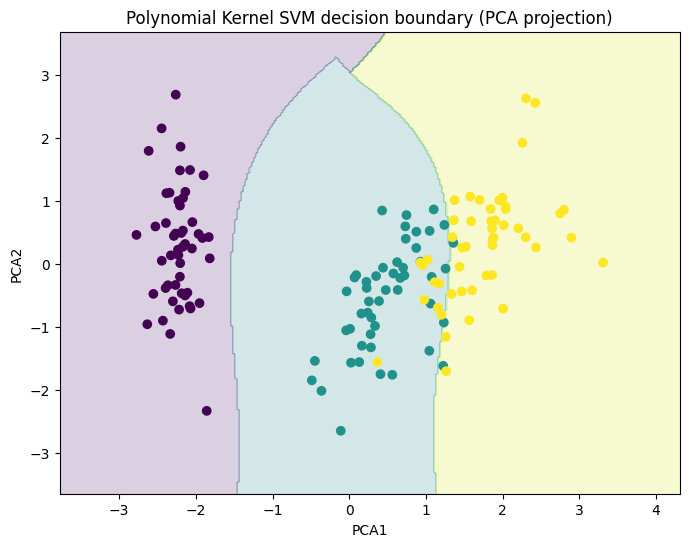

In [5]:
# 4. Train SVM with Polynomial Kernel and visualize decision boundary (2D projection with PCA)
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X2 = pca.fit_transform(X_scaled)

clf = SVC(kernel='poly', degree=3, C=1.0, probability=False)
clf.fit(X2, y)

# create grid
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.2)
scatter = plt.scatter(X2[:,0], X2[:,1], c=y)
plt.title("Polynomial Kernel SVM decision boundary (PCA projection)")
plt.xlabel("PCA1"); plt.ylabel("PCA2")
plt.show()

In [6]:
# 5. Train Gaussian Naive Bayes classifier on Breast Cancer dataset and evaluate accuracy
from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

data = load_breast_cancer()
X = data.data; y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9370629370629371
              precision    recall  f1-score   support

           0       0.96      0.87      0.91        53
           1       0.93      0.98      0.95        90

    accuracy                           0.94       143
   macro avg       0.94      0.92      0.93       143
weighted avg       0.94      0.94      0.94       143



In [8]:
# 6. Train Multinomial Naive Bayes for text classification using 20 Newsgroups (fallback to synthetic if fetch fails)
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

try:
    newsgroups = fetch_20newsgroups(subset='all', remove=('headers','footers','quotes'))
    texts = newsgroups.data
    targets = newsgroups.target
    print("Fetched 20 newsgroups, samples:", len(texts))
except Exception as e:
    print("Could not fetch 20 newsgroups (network?), using synthetic small dataset. Error:", e)
    texts = ["I love programming in Python", "The game was exciting and fun", "Politics and elections are complex", "I enjoy machine learning and data"]*50
    targets = [0,1,2,0]*50

vec = TfidfVectorizer(max_features=2000)
X = vec.fit_transform(texts)
X_train, X_test, y_train, y_test = train_test_split(X, targets, test_size=0.25, random_state=42, stratify=targets[:len(X)])

mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

KeyboardInterrupt: 

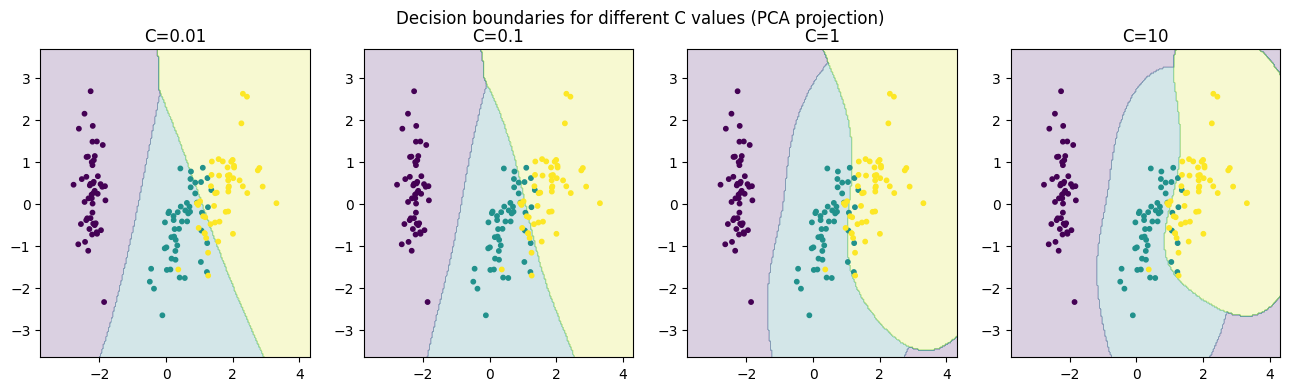

In [9]:
# Practical 1: Train SVM with different C values and compare decision boundaries (PCA projection)
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
X = iris.data; y = iris.target
scaler = StandardScaler(); Xs = scaler.fit_transform(X)
pca = PCA(n_components=2); X2 = pca.fit_transform(Xs)

Cs = [0.01, 0.1, 1, 10]
fig, axes = plt.subplots(1, len(Cs), figsize=(16,4))
for ax, C in zip(axes, Cs):
    clf = SVC(kernel='rbf', C=C, gamma='scale')
    clf.fit(X2, y)
    x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
    y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.2)
    ax.scatter(X2[:,0], X2[:,1], c=y, s=10)
    ax.set_title(f"C={C}")
plt.suptitle("Decision boundaries for different C values (PCA projection)")
plt.show()

In [10]:
# Practical 2: Bernoulli Naive Bayes for binary features (synthetic)
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# create binary features by thresholding
X, y = make_classification(n_samples=1000, n_features=20, n_informative=5, n_redundant=0, random_state=0)
X_bin = (X > np.median(X, axis=0)).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X_bin, y, test_size=0.25, random_state=0, stratify=y)
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_pred = bnb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.868
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       126
           1       0.87      0.86      0.87       124

    accuracy                           0.87       250
   macro avg       0.87      0.87      0.87       250
weighted avg       0.87      0.87      0.87       250



In [11]:
# Practical 3: Apply feature scaling before SVM and compare with unscaled data
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

wine = datasets.load_wine()
X = wine.data; y = wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)

# Unscaled SVM
clf_unscaled = SVC(kernel='rbf', C=1.0)
clf_unscaled.fit(X_train, y_train)
acc_unscaled = accuracy_score(y_test, clf_unscaled.predict(X_test))

# Scaled SVM
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)
clf_scaled = SVC(kernel='rbf', C=1.0)
clf_scaled.fit(X_train_s, y_train)
acc_scaled = accuracy_score(y_test, clf_scaled.predict(X_test_s))

print("Accuracy unscaled:", acc_unscaled)
print("Accuracy scaled:", acc_scaled)

Accuracy unscaled: 0.6
Accuracy scaled: 1.0


In [12]:
# Practical 4: Compare predictions before and after Laplace smoothing using MultinomialNB on discretized features
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

data = load_iris()
X = data.data; y = data.target
# discretize continuous features into counts/bins
kbd = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
X_binned = kbd.fit_transform(X).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X_binned, y, test_size=0.25, random_state=42, stratify=y)

mnb_no_smooth = MultinomialNB(alpha=0.0)
mnb_smooth = MultinomialNB(alpha=1.0)  # Laplace smoothing

mnb_no_smooth.fit(X_train, y_train)
mnb_smooth.fit(X_train, y_train)

print("Accuracy without smoothing:", accuracy_score(y_test, mnb_no_smooth.predict(X_test)))
print("Accuracy with Laplace smoothing:", accuracy_score(y_test, mnb_smooth.predict(X_test)))

Accuracy without smoothing: 0.6578947368421053
Accuracy with Laplace smoothing: 0.6578947368421053


C:\Users\amitk\AppData\Roaming\Python\Python313\site-packages\sklearn\naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
C:\Users\amitk\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [13]:
# Practical 5: Train SVM with GridSearchCV to tune C, gamma, kernel
from sklearn import datasets
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
X = iris.data; y = iris.target
scaler = StandardScaler(); Xs = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.25, random_state=42, stratify=y)

param_grid = {'C':[0.1,1,10], 'gamma':['scale','auto'], 'kernel':['rbf','poly']}
gs = GridSearchCV(SVC(), param_grid, cv=5, n_jobs=-1)
gs.fit(X_train, y_train)
print("Best params:", gs.best_params_)
print("Best CV score:", gs.best_score_)
print("Test score:", gs.score(X_test, y_test))

Best params: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best CV score: 0.9549407114624506
Test score: 0.9473684210526315


In [14]:
# Practical 6: Train SVM on imbalanced dataset and apply class weights
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

X, y = make_classification(n_samples=1000, weights=[0.9,0.1], flip_y=0, random_state=42)
scaler = StandardScaler(); Xs = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.25, random_state=42, stratify=y)

clf_no_weight = SVC(kernel='rbf', class_weight=None)
clf_weight = SVC(kernel='rbf', class_weight='balanced')

clf_no_weight.fit(X_train, y_train)
clf_weight.fit(X_train, y_train)

print("Without class weight:\n", classification_report(y_test, clf_no_weight.predict(X_test)))
print("With class weight:\n", classification_report(y_test, clf_weight.predict(X_test)))

Without class weight:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       225
           1       0.83      0.60      0.70        25

    accuracy                           0.95       250
   macro avg       0.90      0.79      0.83       250
weighted avg       0.94      0.95      0.94       250

With class weight:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96       225
           1       0.59      0.80      0.68        25

    accuracy                           0.92       250
   macro avg       0.78      0.87      0.82       250
weighted avg       0.94      0.92      0.93       250



In [15]:
# Practical 7: Simple Naive Bayes spam detection using synthetic email-like data
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# synthetic small dataset
texts = [
    "Win money now, claim your prize",
    "Limited time offer, click here",
    "Meeting schedule for tomorrow",
    "Let's have lunch and discuss the project",
    "Earn cash fast with this simple trick",
    "Your invoice is attached",
    "Lowest prices on medications, buy now",
    "Project update and next steps"
]
labels = [1,1,0,0,1,0,1,0]  # 1 = spam, 0 = ham

vec = CountVectorizer()
X = vec.fit_transform(texts)
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.25, random_state=0, stratify=labels)

clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [16]:
# Practical 8: Train SVM and Naive Bayes on the same dataset and compare accuracy (Iris)
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
X = iris.data; y = iris.target
scaler = StandardScaler(); Xs = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.25, random_state=0, stratify=y)

svc = SVC(kernel='rbf'); svc.fit(X_train, y_train)
gnb = GaussianNB(); gnb.fit(X_train, y_train)

print("SVM accuracy:", accuracy_score(y_test, svc.predict(X_test)))
print("GaussianNB accuracy:", accuracy_score(y_test, gnb.predict(X_test)))

SVM accuracy: 0.9736842105263158
GaussianNB accuracy: 0.9736842105263158


In [17]:
# Practical 9: Feature selection before training Naive Bayes using SelectKBest
from sklearn.datasets import load_wine
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

data = load_wine()
X = data.data; y = data.target
# chi2 requires non-negative features, so scale to [0,1]
scaler = MinMaxScaler(); X_scaled = scaler.fit_transform(X)
X_new = SelectKBest(chi2, k=5).fit_transform(X_scaled, y)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.25, random_state=0, stratify=y)
gnb = GaussianNB(); gnb.fit(X_train, y_train)
print("Accuracy after RFE-like selection (SelectKBest):", accuracy_score(y_test, gnb.predict(X_test)))

Accuracy after RFE-like selection (SelectKBest): 0.9333333333333333


In [18]:
# Practical 10: Train SVM using OvR and OvO strategies on Wine dataset
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

wine = datasets.load_wine()
X = wine.data; y = wine.target
scaler = StandardScaler(); Xs = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.25, random_state=0, stratify=y)

ovr = OneVsRestClassifier(SVC(kernel='linear'))
ovo = OneVsOneClassifier(SVC(kernel='linear'))

ovr.fit(X_train, y_train)
ovo.fit(X_train, y_train)

print("OvR accuracy:", accuracy_score(y_test, ovr.predict(X_test)))
print("OvO accuracy:", accuracy_score(y_test, ovo.predict(X_test)))

OvR accuracy: 1.0
OvO accuracy: 0.9777777777777777


In [19]:
# Practical 11: Train SVM with Linear, Poly, RBF on Breast Cancer dataset and compare accuracy
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

data = datasets.load_breast_cancer()
X = data.data; y = data.target
scaler = StandardScaler(); Xs = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.25, random_state=0, stratify=y)

for kernel in ['linear','poly','rbf']:
    clf = SVC(kernel=kernel)
    clf.fit(X_train, y_train)
    print(f"{kernel} accuracy:", accuracy_score(y_test, clf.predict(X_test)))

linear accuracy: 0.965034965034965
poly accuracy: 0.9090909090909091
rbf accuracy: 0.958041958041958


In [20]:
# Practical 12: Stratified K-Fold Cross-Validation average accuracy for SVM
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
X = iris.data; y = iris.target
scaler = StandardScaler(); Xs = scaler.fit_transform(X)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
scores = cross_val_score(SVC(kernel='rbf'), Xs, y, cv=skf)
print("Cross-validation scores:", scores)
print("Average accuracy:", scores.mean())

Cross-validation scores: [0.96666667 0.96666667 0.93333333 0.96666667 0.93333333]
Average accuracy: 0.9533333333333334


In [21]:
# Practical 13: Train Naive Bayes with different prior probabilities
from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X = data.data; y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)

for pri in [None, {0:0.9, 1:0.1}, {0:0.5, 1:0.5}]:
    gnb = GaussianNB(priors=None if pri is None else [pri.get(0,0.5), pri.get(1,0.5)])
    gnb.fit(X_train, y_train)
    print("Priors:", pri, "Accuracy:", accuracy_score(y_test, gnb.predict(X_test)))

Priors: None Accuracy: 0.9230769230769231
Priors: {0: 0.9, 1: 0.1} Accuracy: 0.916083916083916
Priors: {0: 0.5, 1: 0.5} Accuracy: 0.9230769230769231


In [22]:
# Practical 14: Recursive Feature Elimination (RFE) before training SVM and compare accuracy
from sklearn.datasets import load_wine
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

data = load_wine()
X = data.data; y = data.target
scaler = StandardScaler(); Xs = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.25, random_state=0, stratify=y)

svc = SVC(kernel='linear')
rfe = RFE(estimator=svc, n_features_to_select=5)
rfe.fit(X_train, y_train)
X_train_r = rfe.transform(X_train); X_test_r = rfe.transform(X_test)

svc.fit(X_train, y_train)
svc_rfe = SVC(kernel='linear'); svc_rfe.fit(X_train_r, y_train)

print("SVM without RFE accuracy:", accuracy_score(y_test, svc.predict(X_test)))
print("SVM with RFE accuracy:", accuracy_score(y_test, svc_rfe.predict(X_test_r)))

SVM without RFE accuracy: 0.9777777777777777
SVM with RFE accuracy: 0.9555555555555556


In [23]:
# Practical 15: Train SVM and evaluate Precision, Recall, F1-Score
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

data = datasets.load_breast_cancer()
X = data.data; y = data.target
scaler = StandardScaler(); Xs = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.25, random_state=0, stratify=y)

clf = SVC()
clf.fit(X_train, y_train)
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        53
           1       0.97      0.97      0.97        90

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



In [24]:
# Practical 16: Train Naive Bayes and evaluate Log Loss (Cross-Entropy Loss)
from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

data = load_breast_cancer()
X = data.data; y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)

gnb = GaussianNB(); gnb.fit(X_train, y_train)
probs = gnb.predict_proba(X_test)
print("Log Loss:", log_loss(y_test, probs))

Log Loss: 1.2210323281930313


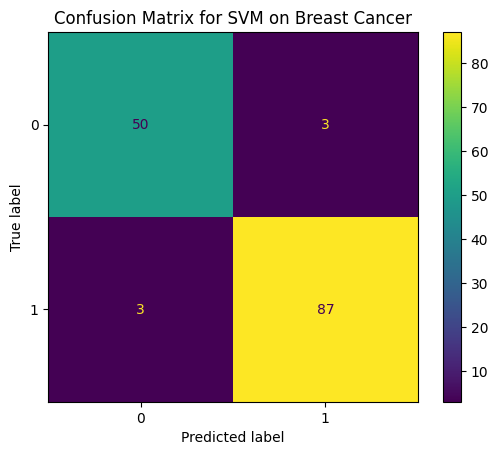

In [25]:
# Practical 17: Train SVM and visualize confusion matrix using matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

data = datasets.load_breast_cancer()
X = data.data; y = data.target
scaler = StandardScaler(); Xs = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.25, random_state=0, stratify=y)

clf = SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=None)
plt.title("Confusion Matrix for SVM on Breast Cancer")
plt.show()

In [26]:
# Practical 18: Train SVR and evaluate Mean Absolute Error (MAE)
from sklearn.datasets import make_regression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = make_regression(n_samples=300, n_features=6, noise=15.0, random_state=42)
scaler = StandardScaler(); Xs = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.2, random_state=42)

svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))

MAE: 110.37036032459923


In [27]:
# Practical 19: Train Naive Bayes and evaluate ROC-AUC score
from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

data = load_breast_cancer()
X = data.data; y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)

gnb = GaussianNB(); gnb.fit(X_train, y_train)
probs = gnb.predict_proba(X_test)[:,1]
print("ROC-AUC:", roc_auc_score(y_test, probs))

ROC-AUC: 0.9756813417190777


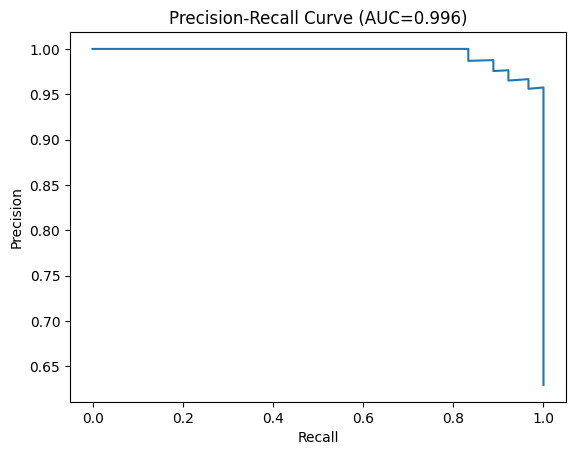

In [28]:
# Practical 20: Train SVM and visualize Precision-Recall Curve
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, auc
from sklearn.preprocessing import StandardScaler
import numpy as np

data = datasets.load_breast_cancer()
X = data.data; y = data.target
scaler = StandardScaler(); Xs = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.25, random_state=0, stratify=y)

clf = SVC(probability=True)
clf.fit(X_train, y_train)
probs = clf.predict_proba(X_test)[:,1]
precision, recall, _ = precision_recall_curve(y_test, probs)
pr_auc = auc(recall, precision)
plt.plot(recall, precision)
plt.xlabel("Recall"); plt.ylabel("Precision"); plt.title(f"Precision-Recall Curve (AUC={pr_auc:.3f})")
plt.show()